In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical
from keras.optimizers import Adam
from matplotlib import pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
y_train_cat = to_categorical(y_train)
y_actuals = y_test
y_test_cat = to_categorical(y_test)

In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [6]:
cb = ModelCheckpoint("best_model.h5", monitor="val_loss", mode='min',save_best_only=True)

In [7]:
result = model.fit(x_train, y_train_cat, epochs=30   , batch_size=64, validation_split=0.2, callbacks=[cb])

Epoch 1/30
622/625 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2814 - loss: 3.0617

625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.3651 - loss: 1.9259 - val_accuracy: 0.4422 - val_loss: 1.5307
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4908 - loss: 1.4123

625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.5083 - loss: 1.3790 - val_accuracy: 0.5261 - val_loss: 1.3403
Epoch 3/30
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5795 - loss: 1.1972

625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.5846 - loss: 1.1818 - val_accuracy: 0.5831 - val_loss: 1.2267
Epoch 4/30
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6510 - loss: 1.0035

625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.6493 - loss: 1.0124 - val_accuracy: 0.6081 - val_loss: 1.1397
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.7020 - loss: 0.8593 - val_accuracy: 0.6099 - val_loss: 1.1551
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.7519 - loss: 0.7167 - val_accuracy: 0.5987 - val_loss: 1.2877
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.7998 - loss: 0.5842 - val_accuracy: 0.6216 - val_loss: 1.2483
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.8372 - loss: 0.4802 - val_accuracy: 0.6258 - val_loss: 1.3939
Epoch 9/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.8691 - loss: 0.3922 - val_accuracy: 0.6133 - val_loss: 1.4991
Epoch 10/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.8900 - loss: 0.3328 - val_accuracy: 0.6083 - val_loss: 1.6126
Epoch 11/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.9059 - loss: 0.2843 - val_accur

In [8]:
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat)
predictions = model.predict(x_test)
predictedLabel = np.argmax(predictions, axis=1)
print(f"Predicted label: {(predictedLabel[10])}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6150 - loss: 2.4970
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predicted label: 0


Act: [3] 
 Pred: 8
Act: [8] 
 Pred: 1
Act: [8] 
 Pred: 8
Act: [0] 
 Pred: 0
Act: [6] 
 Pred: 4


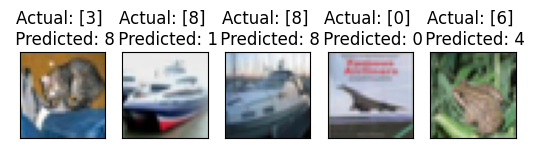

In [9]:
for image in range(5):
    print(f"Act: {y_test[image]} \n Pred: {predictedLabel[image]}")
    plt.subplot(1,5,image+1, title=f"Actual: {y_actuals[image]} \n Predicted: {predictedLabel[image]}")
    plt.imshow(x_test[image])
    plt.xticks([])
    plt.yticks([])
plt.show()

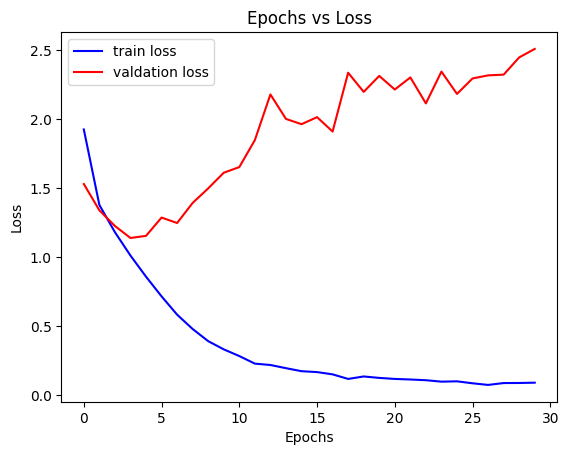

In [10]:
plt.plot(result.history['loss'],label='train loss',color='blue')
plt.plot(result.history['val_loss'],label='valdation loss',color='red')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epochs vs Loss")
plt.legend()
plt.show()

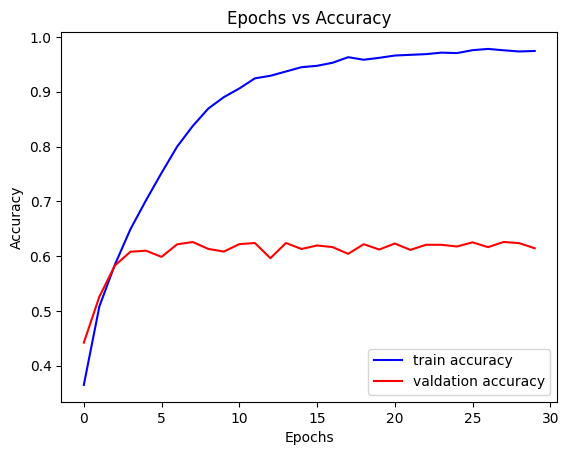

In [11]:
plt.plot(result.history['accuracy'],label='train accuracy',color='blue')
plt.plot(result.history['val_accuracy'],label='valdation accuracy',color='red')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Epochs vs Accuracy")
plt.legend()
plt.show()